# Classification Modelling | Predicting Etsy Listing Views Success
###### Key skills in this project: Binary Classification, Data Collection from API's, Data Cleaning, Data Formatting, Machine Learning, Feature Engineering, Catergorical Data Encoding, Feature Selection with Point-Biserial Correlation Test, NLP

## 1. Introduction & Problem Statement
Our client is an artist who has recently launched their Etsy store. Our client is primarily selling prints of their work and would like to understand what factors contribute to the number of views that a print listing garners, and to predict whether a listing they post will be successful in the exposure it gets. The purpose of this project is to analyse the relationship between views and properties of print listings, as well as create a model that will predict whether a listing will garner more views than 50% of other print listings on Etsy.

## 2. Background & Context
### 2.1 Etsy
Etsy is an e-commerce marketplace focused on hand-crafted and vintage items. Etsy sellers create their own stores on Etsy via their own store page, where the seller can upload their own products. Buyers on the other hand can search for product using the Etsy search bar, or explore products in categories by clicking on the category links. Etsy acts as the 'middle man' between the seller and buyer. Sellers pay to upload their products, and all transactions are conducted through Etsy. However, the manufacture of the products, delivery, and policies such as return policies fall under the jurisdiction of the seller. Examples of products that buyers can purchase on the Etsy marketplace are Prints, Paintings, Wall Decor, Jewellery, Accessories, Furniture and Craft Supplies. 

### 2.2 SEO
Sellers are required to tag keywords to their products in order to describe the item they are selling. This plays a role in the function of Etsy's search engine. When a buyer is searching for a specific product, Etsy matches their search query to the tags and titles of listings to identify items that are of interest to the buyer [1, https://help.etsy.com/hc/en-us/articles/115015663987-Shop-Improvement-and-Search-Engine-Optimization-SEO-?segment=selling]

Additionally, Etsy uses stemming to reduce buyers' searches, and sellers' keywords and titles to optimizing their search function. Stemming involves reducing a word to its root word. For example, 'decor', 'decorations' and 'decoration', all have the same root word being 'decor' - as such, when searching for 'decorations', the remaining two decor word variations will still be relevant, as they share the same root word.

### 2.3 Listing Properties
When uploading a listing to Etsy, the seller is provided listing properties to select on the upload page. Examples of properties are order processing times, whether a product is digital, whether the seller wants to mark the product as a featured item on their homepage (listing will be in the first row of listings on the seller's shop-page), and so forth. These properties play a role in Etsy's search functionallity, as well as allows buyers to filter products that meet their requirements.

### 2.4 Listing Views
The higher the number of views a listing garners, the higher the probability of a purchase. As such, the number of views and properties that influence this variable are the focus for this analysis. This project will be a Binary Classification model, where we will predict whether a Print Listing will get more views than 50% of the other print Listings on Etsy.

## 3. Methodology
The following methodology will be followed for this project:

### 3.1 Data Collection
1. Collect listing data using Etsy API
2. Collect shop data using Etsy API

### 3.2 Data Preperation
1. Remove duplicated listings
2. Process text data (titles & tags) - remove punctuation & stopwords, stem words, and place into a list
3. Filter out observations that are not prints (do not pertain to problem statement)
4. Merging the listing and shop dataframes together
5. Process missing values
6. Convert currency to Euros
7. Feature Engineering:
    - Create a binary feature that indicates whether 'print' is in the first three words of the title
    - Create an original upload date feature
8. Vectorize words in the tags and title feature
9. Select significant tag and title words using Point-Biserial Correlation test

### 3.3 Data Visualization
Investigate the relationship between views and:
1. Tags & Titles
2. Listing Properties
3. Shop Properties 

### 3.4 Modelling
1. Feature selection
2. Encode categorical data
3. Model with Logistic Regression
4. Model with Naives Bayes Classifier
5. Model with Random Forest Classifier
6. Evaluate Models
7. Model Selection & Feature Importance

### 3.5 Conculsion & Inferences
1. Conclude model findings & make recommendations
2. Summarize inferences for our client

## 4. Data Collection
The Etsy listing and Shop data was collected via the Etsy API and saved to a csv file on the 07/08/2020. I have commented an extract of the code used to collect the data below. 
Additionally, the following method was used:
1. Collect taxonomy data to identify which taxonomy path Prints fall under
2. Use required taxonomy path to collect listings data
3. Create a list of all user id's from the listings data and run a for loop to collect shop data for each listing.

In [4]:
# import requests
# import pandas as pd

# #extracting the taxonomy data to identify which taxonomy path Prints lie under

# #constructing GET request for TAXONOMY
# API_KEY = '?api_key=xqv9ao861q7w7tidp7n2oqo3'
# base_url = 'https://openapi.etsy.com/v2'
# extension = '/taxonomy/seller/get'
# url = base_url + extension + API_KEY
# r = requests.get(url)
# info = r.json()

# taxonomy_df = pd.DataFrame(info['results'])


# #constructing GET request for LISTINGS
# extension = '/listings/active'
# url = base_url + extension + API_KEY
# r = requests.get(url, params={'taxonomy_id':[2078,1029], 'limit':100})
# info = r.json()

# etsy_data = pd.DataFrame()
# data = []

# for i in range(0,40000,100):
#     r = requests.get(url, params={'sort on': 'score', 'taxonomy_id':[2078,1029], 'limit':100, 'offset': i})
#     info = r.json()
#     pages = len(info['results'])
    
#     for x in range(pages):
#         data.append(info['results'][x])
#     print(i)
    
# etsy_data = etsy_data.append(data)


# #constructing GET request for SHOPS
# shop_data = []
# n=1
# listings = prints.listing_id.to_list()

# for listing in listings:
#     print(n)
#     API_KEY = '?api_key=xqv9ao861q7w7tidp7n2oqo3'
#     base_url = 'https://openapi.etsy.com/v2'
#     extension = '/shops/listing/'
#     url = base_url + extension + str(listing) + API_KEY
#     r = requests.get(url)
#     info=r.json()
#     results = info['results']
#     shop_data.append(results)
#     n = n+1

In [5]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import datetime
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [6]:
#loading listings data
data = pd.read_csv('etsy_listings.csv')

#displaying listings data
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,listing_id,state,user_id,category_id,title,description,creation_tsz,ending_tsz,original_creation_tsz,last_modified_tsz,price,currency_code,quantity,sku,tags,materials,shop_section_id,featured_rank,state_tsz,url,views,num_favorers,shipping_template_id,processing_min,processing_max,who_made,is_supply,when_made,item_weight,item_weight_unit,item_length,item_width,item_height,item_dimensions_unit,is_private,recipient,occasion,style,non_taxable,is_customizable,is_digital,file_data,should_auto_renew,language,has_variations,taxonomy_id,taxonomy_path,used_manufacturer,is_vintage
0,0,817904478,active,22321713.0,NaN,"Unapologetically Dope, Dope Girl, Boss Shirt, ...",INSTANT DOWNLOAD\nNo item will be shipped to y...,1.596817e+09,1.607361e+09,1.593483e+09,1.596817e+09,5.00,USD,90.0,[],"['birthday file', 'heel svg', 'svg', 'birthday...",[],27482139.0,NaN,1.593483e+09,https://www.etsy.com/listing/817904478/unapolo...,55.0,5.0,NaN,NaN,NaN,i_did,False,2020_2020,NaN,oz,NaN,NaN,NaN,in,False,NaN,NaN,NaN,False,True,True,"2 PNG, 2 other files",True,en-US,False,2078.0,"['Art & Collectibles', 'Prints', 'Digital Prin...",False,False
1,1,707533264,active,56203544.0,NaN,Ferns Print | Ferns Poster | Ferns Wall Art | ...,Add vintage feel to your home with this ferns ...,1.596817e+09,1.607361e+09,1.563158e+09,1.596817e+09,15.00,USD,6.0,[],"['Farmhouse style', 'Botany art', 'Plant print...","['Italian paper', 'Poster', 'Wood', 'Stain', '...",18514616.0,NaN,1.595903e+09,https://www.etsy.com/listing/707533264/ferns-p...,5291.0,1457.0,2.451531e+10,6.0,7.0,i_did,False,2020_2020,16.0,oz,26.0,3.0,3.0,in,False,NaN,NaN,NaN,False,False,False,NaN,True,en-US,True,2844.0,"['Home & Living', 'Home Décor', 'Wall Décor', ...",False,False
2,2,844237589,active,82990365.0,NaN,"God Knew My Heart Needed You framed sign, Chri...","God Knew My Heart Needed You framed sign, Chri...",1.596817e+09,1.607361e+09,1.595650e+09,1.596817e+09,34.95,USD,99.0,[],"['Country Living Room', 'Farmhouse Decor', 'Ru...","['Wood', 'paint', 'God Knew My Heart Needed You']",22318096.0,NaN,1.595650e+09,https://www.etsy.com/listing/844237589/god-kne...,5.0,0.0,6.191360e+10,2.0,5.0,i_did,False,made_to_order,32.0,oz,18.0,12.0,2.0,in,False,NaN,NaN,NaN,False,True,False,NaN,True,en-US,False,2844.0,"['Home & Living', 'Home Décor', 'Wall Décor', ...",False,False
3,3,675638967,active,197344425.0,NaN,"Star Map Print Custom By Date, PRINTABLE Star ...",★ This listing is for a high resolution file d...,1.596817e+09,1.607361e+09,1.547717e+09,1.596817e+09,16.00,USD,1.0,['pop'],"['Astronomy Gifts', 'Galaxy Print', 'Constella...","['ANY SIZE up to 24x30', 'PRINTABLE digital ma...",NaN,NaN,1.596742e+09,https://www.etsy.com/listing/675638967/star-ma...,45208.0,2818.0,NaN,1.0,1.0,i_did,False,2020_2020,NaN,g,NaN,NaN,NaN,mm,False,NaN,NaN,NaN,False,False,False,NaN,True,en-US,True,1029.0,"['Home & Living', 'Home Décor', 'Wall Décor', ...",False,False
4,4,794821733,active,16143436.0,NaN,Bug Mini Prints,5x5 inch prints quality matte cardstock\n\nNO ...,1.596817e+09,1.607361e+09,1.586672e+09,1.596817e+09,6.00,USD,696.0,[],"['bug', 'bugs', 'grasshoper', 'beetle', 'stag'...",[],NaN,NaN,1.586672e+09,https://www.etsy.com/listing/794821733/bug-min...,139.0,56.0,NaN,3.0,5.0,i_did,False,2010_2019,NaN,oz,NaN,NaN,NaN,in,False,NaN,NaN,NaN,False,False,False,NaN,True,en-US,True,2078.0,"['Art & Collectibles', 'Prints', 'Digital Prin...",False,False


In [7]:
#loading etsy shop data
shop_df = pd.read_csv('cleanedetsyshops.csv')

#displaying shop data
shop_df.head()

,Unnamed: 0,Unnamed: 0.1,shop_id,shop_name,user_id,creation_tsz,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,last_updated_tsz,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_updated_tsz,policy_has_private_receipt_info,vacation_autoreply,url,image_url_760x100,num_favorers,languages,upcoming_local_event_id,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,has_unstructured_policies,custom_shops_state,include_dispute_form_link,is_direct_checkout_onboarded,policy_privacy,is_calculated_eligible,is_opted_in_to_buyer_promise,is_shop_us_based,status,story_headline,story_leading_paragraph,story,related_links,referred_by_user_id,feedback_info,user_profile_id,bio,gender,birth_month,birth_day,join_tsz,materials,country_id,region,city,location,avatar_id,transaction_buy_count,transaction_sold_count,is_seller,image_url_75x75,first_name,last_name,rating_count,rating
0,0,0,10273657.0,MichiganStudio,56203544.0,1.416064e+09,Vintage inspired and handmade goods,**Please note orders are currently requiring ...,USD,False,Purchases can be made on our website. Etsy has...,Thank you for your order! **Please note order...,NaN,1.596922e+09,116.0,0.0,MichiganStudio,False,Thanks for visiting our shop! Sign-up for our...,Please note if we ship to incorrect addresses ...,Please note the estimated delivery date is pur...,**We are currently not accepting returns or ex...,Sign-up for our emails to be notified of new p...,NaN,1.594160e+09,False,Purchases can be made on our website. Etsy has...,https://www.etsy.com/shop/MichiganStudio?utm_s...,NaN,1644.0,['en-US'],NaN,https://i.etsystatic.com/isla/385c19/22739549/...,False,False,True,3.0,False,True,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0,10273657.0,MichiganStudio,56203544.0,1.416064e+09,Vintage inspired and handmade goods,**Please note orders are currently requiring ...,USD,False,Purchases can be made on our website. Etsy has...,Thank you for your order! **Please note order...,NaN,1.596922e+09,116.0,0.0,MichiganStudio,False,Thanks for visiting our shop! Sign-up for our...,Please note if we ship to incorrect addresses ...,Please note the estimated delivery date is pur...,**We are currently not accepting returns or ex...,Sign-up for our emails to be notified of new p...,NaN,1.594160e+09,False,Purchases can be made on our website. Etsy has...,https://www.etsy.com/shop/MichiganStudio?utm_s...,NaN,1644.0,['en-US'],NaN,https://i.etsystatic.com/isla/385c19/22739549/...,False,False,True,3.0,False,True,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1,19197054.0,GalaxyGalGifts,197344425.0,1.545824e+09,UNIQUE star maps for any occasion,🔥 AUGUST SALE! Get 20% OFF - limited time only...,USD,False,NaN,NaN,NaN,1.596922e+09,147.0,1.0,pn5s3okl,False,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,NaN,False,NaN,https://www.etsy.com/shop/GalaxyGalGifts?utm_s...,NaN,987.0,['en-US'],NaN,https://i.etsystatic.com/isla/01f078/33721026/...,True,True,False,NaN,False,False,NaN,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,2,12072654.0,Babirousa,16143436.0,1.480177e+09,"Vibrant and colorful charms, buttons, prints a...",NaN,USD,False,NaN,NaN,NaN,1.596829e+09,14.0,0.0,Hamber,False,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,False,NaN,https://www.etsy.com/shop/Babirousa?utm_source...,https://i.etsystatic.com/iusb/5e7ba7/22915820/...,367.0,['en-US'],NaN,https://i.etsystatic.com/isla/51d697/22896324/...,False,False,False,NaN,False,True,NaN,True,False,True,NaN,NaN,NaN,NaN,

## 5. Data Preperation

### 5.1 Duplicated Data

In [8]:
#checking for duplicates
data.listing_id.duplicated().value_counts()

False    10177
True      1923
Name: listing_id, dtype: int64

In [9]:
#dropping all duplicated items
data.drop_duplicates('listing_id', inplace=True)

### 5.2 Processing Tags & Title Text

In [10]:
#first let's see if there are missing values
data.tags.isnull().sum(), data.title.isnull().sum()

(2, 2)

In [11]:
#let's take a closer look
data[data.tags.isnull()]

,Unnamed: 0,listing_id,state,user_id,category_id,title,description,creation_tsz,ending_tsz,original_creation_tsz,last_modified_tsz,price,currency_code,quantity,sku,tags,materials,shop_section_id,featured_rank,state_tsz,url,views,num_favorers,shipping_template_id,processing_min,processing_max,who_made,is_supply,when_made,item_weight,item_weight_unit,item_length,item_width,item_height,item_dimensions_unit,is_private,recipient,occasion,style,non_taxable,is_customizable,is_digital,file_data,should_auto_renew,language,has_variations,taxonomy_id,taxonomy_path,used_manufacturer,is_vintage
183,183,851114477,unavailable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['5F2D7A13C7372_10754', '5F2D7A13C7372_10751',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1501,1501,851106261,unavailable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['5F2D76006B8B9_10754', '5F2D76006B8B9_3', '5F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


These appear to be erroneous observations. They will be dropped from the dataframe.

In [12]:
#removing data with missing values in the tags/title criteria
data.dropna(subset=['tags'], inplace=True)

In [13]:
#creating a text processor to remove punctuation & stopwords, stem the words, and remove duplicates.

from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def processor(text):
    text = text.lower()
    punc_removed = [char for char in text if char not in string.punctuation]
    join = "".join(punc_removed)
    final = [word for word in join.split() if word not in stopwords.words('english')]
    
    stem = [porter.stem(word) for word in final]
    no_duplicates = list(set(stem))
    
    return no_duplicates

In [14]:
#processing titles and tags, and placing into a list

#applying function to title feature
data.title = data.title.apply(processor)

#applying function to tags feature
data.tags = data.tags.apply(processor)

### 5.3 Selecting Observations that are Prints

In [15]:
#defining whether a listing is a print

#creating a function
def isprint(title, tags):
    if ('print' in title) or ('print' in tags):
        return 1
    elif ('prints' in title) or ('prints' in tags):
        return 1
    else:
        return 0
    
#applying function to dataframe and creating isprint column
data['isprint'] = data[['title', 'tags']].apply(lambda x: isprint(*x), axis=1)

#filtering prints only
data = data[data.isprint == 1]
data.index = range(len(data))

### 5.4 Merging Listings and Shops Data Frame

In [16]:
#displaying first few rows of shop_df
shop_df.head(3)

,Unnamed: 0,Unnamed: 0.1,shop_id,shop_name,user_id,creation_tsz,title,announcement,currency_code,is_vacation,vacation_message,sale_message,digital_sale_message,last_updated_tsz,listing_active_count,digital_listing_count,login_name,accepts_custom_requests,policy_welcome,policy_payment,policy_shipping,policy_refunds,policy_additional,policy_seller_info,policy_updated_tsz,policy_has_private_receipt_info,vacation_autoreply,url,image_url_760x100,num_favorers,languages,upcoming_local_event_id,icon_url_fullxfull,is_using_structured_policies,has_onboarded_structured_policies,has_unstructured_policies,custom_shops_state,include_dispute_form_link,is_direct_checkout_onboarded,policy_privacy,is_calculated_eligible,is_opted_in_to_buyer_promise,is_shop_us_based,status,story_headline,story_leading_paragraph,story,related_links,referred_by_user_id,feedback_info,user_profile_id,bio,gender,birth_month,birth_day,join_tsz,materials,country_id,region,city,location,avatar_id,transaction_buy_count,transaction_sold_count,is_seller,image_url_75x75,first_name,last_name,rating_count,rating
0,0,0,10273657.0,MichiganStudio,56203544.0,1.416064e+09,Vintage inspired and handmade goods,**Please note orders are currently requiring ...,USD,False,Purchases can be made on our website. Etsy has...,Thank you for your order! **Please note order...,NaN,1.596922e+09,116.0,0.0,MichiganStudio,False,Thanks for visiting our shop! Sign-up for our...,Please note if we ship to incorrect addresses ...,Please note the estimated delivery date is pur...,**We are currently not accepting returns or ex...,Sign-up for our emails to be notified of new p...,NaN,1.594160e+09,False,Purchases can be made on our website. Etsy has...,https://www.etsy.com/shop/MichiganStudio?utm_s...,NaN,1644.0,['en-US'],NaN,https://i.etsystatic.com/isla/385c19/22739549/...,False,False,True,3.0,False,True,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0,10273657.0,MichiganStudio,56203544.0,1.416064e+09,Vintage inspired and handmade goods,**Please note orders are currently requiring ...,USD,False,Purchases can be made on our website. Etsy has...,Thank you for your order! **Please note order...,NaN,1.596922e+09,116.0,0.0,MichiganStudio,False,Thanks for visiting our shop! Sign-up for our...,Please note if we ship to incorrect addresses ...,Please note the estimated delivery date is pur...,**We are currently not accepting returns or ex...,Sign-up for our emails to be notified of new p...,NaN,1.594160e+09,False,Purchases can be made on our website. Etsy has...,https://www.etsy.com/shop/MichiganStudio?utm_s...,NaN,1644.0,['en-US'],NaN,https://i.etsystatic.com/isla/385c19/22739549/...,False,False,True,3.0,False,True,NaN,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1,19197054.0,GalaxyGalGifts,197344425.0,1.545824e+09,UNIQUE star maps for any occasion,🔥 AUGUST SALE! Get 20% OFF - limited time only...,USD,False,NaN,NaN,NaN,1.596922e+09,147.0,1.0,pn5s3okl,False,NaN,SECURE OPTIONS\nEtsy keeps your payment inform...,PROCESSING TIME\nThe time I need to prepare an...,I GLADLY ACCEPT RETURNS AND EXCHANGES\nJust co...,NaN,NaN,NaN,False,NaN,https://www.etsy.com/shop/GalaxyGalGifts?utm_s...,NaN,987.0,['en-US'],NaN,https://i.etsystatic.com/isla/01f078/33721026/...,True,True,False,NaN,False,False,NaN,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will extract features that are of interest to our data analysis.

In [17]:
#selecting required columns
shop_cols = ['shop_id','shop_name','user_id','listing_active_count', 'digital_listing_count','num_favorers','transaction_sold_count','rating_count']
shop_df = shop_df[shop_cols]

In [18]:
#checking null values
shop_df.isnull().sum()

shop_id                      0
shop_name                    0
user_id                      0
listing_active_count         0
digital_listing_count        0
num_favorers                 0
transaction_sold_count    5125
rating_count              5125
dtype: int64

All values for transactions and rating_counts are missing as authorization is required to access this information. We will have to remove this feature from our analysis.

In [19]:
#dropping columns with all missing values
shop_col_drop = ['transaction_sold_count', 'rating_count']
shop_df.drop(shop_col_drop, 1, inplace=True)

In [20]:
#merging the dataframes
data = data.merge(shop_df, on='user_id', how='left')
data.drop_duplicates('listing_id', inplace=True)

### 5.5 Processing Missing Values

In [21]:
#check for missing values
data.isnull().sum()

Unnamed: 0                  0
listing_id                  0
state                       0
user_id                     0
category_id              4282
title                       0
description                 0
creation_tsz                0
ending_tsz                  0
original_creation_tsz       0
last_modified_tsz           0
price                       1
currency_code               0
quantity                    0
sku                         0
tags                        0
materials                   0
shop_section_id           617
featured_rank            3868
state_tsz                   0
url                         0
views                       0
num_favorers_x              0
shipping_template_id     1795
processing_min           1266
processing_max           1266
who_made                    0
is_supply                   0
when_made                   0
item_weight              3766
item_weight_unit          156
item_length              3764
item_width               3764
item_heigh

We will drop features where all or the majority of data is missing - imputing these features may result in undesirable results. Additionally features such as 'category_id' have been deprecated. 

In [22]:
#creating a list of features to drop
cols_drop = ['category_id','style','occasion','recipient','item_weight','item_length','item_width','item_height','shop_section_id','item_weight_unit','item_dimensions_unit']

#dropping these features
data.drop(cols_drop,1, inplace=True)

In [23]:
#dropping observation with 1 listing price missing
data.dropna(subset=['price'], axis=0, inplace=True)

In [24]:
#change featured rank feature to featured or not

def featured(rank):
        if np.isnan(rank):
            return False
        else: return True
    
#apply method to dataframe
data['is_featured'] = data.featured_rank.apply(featured)

#drop featured_rank column
data.drop(['featured_rank'],1,inplace=True)

In [25]:
#dropping shipping template id - unique per listing
data.drop(['shipping_template_id'],1,inplace=True)

In [26]:
#viewing number if NaN processing min are digital items
data[(data.processing_min.isnull()) & (data.is_digital==True)].shape

(1183, 44)

In [27]:
#displaying range of processing min values
data.processing_min.value_counts()

1.0     1678
3.0      830
5.0      277
2.0      139
4.0       26
10.0      19
6.0       19
7.0       10
15.0       7
8.0        4
20.0       2
25.0       1
45.0       1
30.0       1
40.0       1
Name: processing_min, dtype: int64

The majority of the observations with missing values for the 'processing_min' feature are digital products. As such, they are available instantly. Thus we will impute these values to 0, as there is no 0 category for the 'processing_min' feature.

In [28]:
#imputing processing min and max
data.processing_min.fillna(0, inplace=True)
data.processing_max.fillna(0, inplace=True)

In [29]:
#viewing which file data values are NaN
data[(data.file_data.isnull()) & (data.is_digital == True)]

,Unnamed: 0,listing_id,state,user_id,title,description,creation_tsz,ending_tsz,original_creation_tsz,last_modified_tsz,price,currency_code,quantity,sku,tags,materials,state_tsz,url,views,num_favorers_x,processing_min,processing_max,who_made,is_supply,when_made,is_private,non_taxable,is_customizable,is_digital,file_data,should_auto_renew,language,has_variations,taxonomy_id,taxonomy_path,used_manufacturer,is_vintage,isprint,shop_id,shop_name,listing_active_count,digital_listing_count,num_favorers_y,is_featured


All observations with mising values for the 'file_data' feature are not digital products. Thus we will impute this to 'N/A'

In [30]:
#imputing missing file_data missing values
data.file_data.fillna('N/A', inplace=True)

#selecting listings with shop data
data = data[data.shop_id.notnull()]

### 5.6 Convert all Currencies to EUR
Our client is from Amsterdam, and so all currencies will be converted to Euros for standardization, and better understanding for our client.

In [31]:
#converting currency
currency_df = pd.DataFrame(data.currency_code.value_counts().index.to_list(), columns=['currency_code'])
currency_df['exch_rate'] = [0.85, 1.11, 1, 0.63, 0.61, 0.56, 0.62, 0.0080, 0.2, 0.11, 0.017, 0.25, 0.93, 0.097]

#merging currency df with data df to calc price in EUR
data = data.merge(currency_df, how='right', on='currency_code')

# #creating a price in EUR feature
data['price_EUR'] = data.price * data.exch_rate

### 5.7 Feature Engineering

We will create a feature to determine whether the word 'Print' is in the first three words of the title to determine whether indicating the type of product in the beginning of the listing's title influences views.

In [32]:
#creating a feature if 'print' is in the first 3 words of title
def print_title_beginning(title):
    if (len(title) >= 3):
        first_n_word = title[0:3]
        if ('print' in first_n_word):
            return True
        elif ('prints' in first_n_word):
            return True
        else:
            return False
    else:
        if ('print' in title):
            return True
        elif ('prints' in title):
            return True
        else:
            return False
        
data['title_print_begin'] = data.title.apply(print_title_beginning)

In [33]:
#creating an original upload date
data['upload_date'] = pd.to_datetime(data.original_creation_tsz, unit='s').dt.date

Because new listings have no views, they will incur bias in our analysis. This is because features that are significantly correlated to views may be weighted differently if many new listings with 0 views share the same feature values. As such, these listings need to be removed from our analysis.

In [34]:
#drop new listings with 0 views
new_noviews = data[(data.views == 0) & (data.upload_date == datetime.date(2020,8,7))].index
data.drop(new_noviews, inplace=True)

We have engineered many features, as such we can drop the old features that have been engineered as they are now redundent. Additionally, there are features such as 'state' which does not benefit our analysis, as all listings with an active state were requested when collecting the data via the API.

In [35]:
#removing unrequired and redundant features
cols_to_drop = ['Unnamed: 0', 'state', 'price','currency_code','state_tsz','url','is_private','exch_rate']
data.drop(cols_to_drop, axis=1, inplace=True)
data.index = range(len(data))

### 5.8 Tags & Title Word Vectorization
Our tags and titles were already processed in section 5.2. Since they are in a list format we will use the MultiLabelBinarizer for word vectorization.

In [36]:
#creating a dataframe for vectorized tags
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

tags_mlb = pd.DataFrame(mlb.fit_transform(data.tags),columns=mlb.classes_)

In [37]:
#creating a dataframe for vectorized titles
lb = MultiLabelBinarizer()

title_mlb = pd.DataFrame(lb.fit_transform(data.title),columns=lb.classes_)

In [38]:
#seeing number of unique words
tags_mlb.shape, title_mlb.shape

((3732, 6196), (3732, 6231))

### 5.9 Selecting Significant Tags
There are a high number of unique words in the titles and tags. We will select only the significantly correlated words. Additionally, because of the high variance in the number of views, some correlations may be skewed. As such, we will select significant words that occur more than 10 times in our dataset

We will be using the Point-Biserial Correlation test, with a significance level of 0.05. A p-value that is less than our significance level allows us to reject the null hypothesis - being that there is no relationship between the word and views.

In [41]:
#creating a function to test the significance of tags using Point-Biserial correlation

from scipy import stats

def word_significance(df):
    columns = df.columns
    correl = []
    p_values = []
    counts = []
    
    #calculate corr and p-values
    for col in columns:
        corr, p_value = stats.pointbiserialr(df[col], data.views)
        correl.append(corr)
        p_values.append(p_value)
        counts.append(df[col].sum())
    
    #creating a correlation dataframe for non-split tags
    sig_df = pd.DataFrame()

    sig_df['features'] = columns
    sig_df['correl'] = correl
    sig_df['p_values'] = p_values
    sig_df['counts'] = counts
    
    sig_df = sig_df[(sig_df.p_values < 0.05) & (sig_df.counts > 10)].sort_values(by='correl', ascending=False)
    
    return sig_df

In [42]:
#running significance test for tags
tags_sig = word_significance(tags_mlb)

#displaying top 20 significant tags
tags_sig.head(20)

,features,correl,p_values,counts
49,1st,0.144006,9.530949e-19,14
332,anniversari,0.143277,1.427119e-18,75
3791,mother,0.123651,3.444617e-14,48
5757,uniqu,0.122355,6.363570e-14,38
3722,mom,0.120111,1.814444e-13,58
6024,wife,0.115778,1.299423e-12,27
1162,christma,0.111398,8.837352e-12,79
1468,custom,0.100029,9.119859e-10,217
107,6,0.092821,1.340653e-08,17
1541,day,0.090933,2.624478e-08,90


In [43]:
#running significance test on title
title_sig = word_significance(title_mlb)

#displaying top 20 significant titles
title_sig.head(20)

,features,correl,p_values,counts
3774,mom,0.205744,5.851109e-37,21
3830,mother,0.192231,2.148563e-32,21
1431,christma,0.137257,3.696431e-17,36
608,anniversari,0.121515,9.440297e-14,40
989,birthday,0.112687,5.064246e-12,53
1693,custom,0.106913,5.835452e-11,150
2511,gift,0.089210,4.790413e-08,553
367,6,0.088201,6.780118e-08,31
4333,playroom,0.086819,1.083986e-07,30
5209,sky,0.085878,1.486254e-07,13


## 6. Data Visualization

In [197]:
#formatting default visual parameters
sns.set_style('white')
sns.set_palette('muted')

### 6.1 Listing Views

Text(0.5, 1.0, 'Views Probability Distribution')

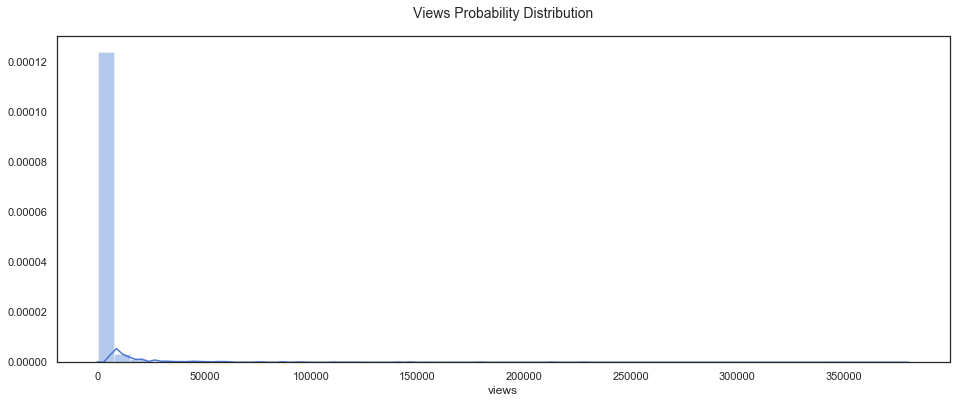

In [198]:
#plotting probability distribution for views
plt.rcParams['figure.figsize'] = (16, 6)
sns.distplot(data.views)
plt.title('Views Probability Distribution', fontsize=14)

In [46]:
#summarizing statistics for views
data.describe().views

count      3732.000000
mean       2221.448285
std       11677.836298
min           0.000000
25%          29.000000
50%         147.500000
75%         787.500000
max      380353.000000
Name: views, dtype: float64

The views feature has a high level of variance. The average number of views per listing is 2221, with a exceptionally high standard deviation of 11677.84. The median, however, sits at around 148 views. Because of the high variance in this feature, the median is a better measure than the mean to understand the number of views to expect per listing - whereby 50% of listings garner 148 views or less. The remaining 50% garner more than 148 views, where the listing views have high variance.

To capture this - We will create a feature that states whether the listing is in the lower 50%, or the upper 50% in terms of the number of views. This feature will be used as a target variable to determine whether a listing has a probability of getting more views than 50% of the other listings

In [47]:
#creating a function
def median(views):
    if (views <= 148):
        return 0
    else:
        return 1

#applying function to the feature
data['upper_views'] = data.views.apply(median)

### 6.2 Listing Date

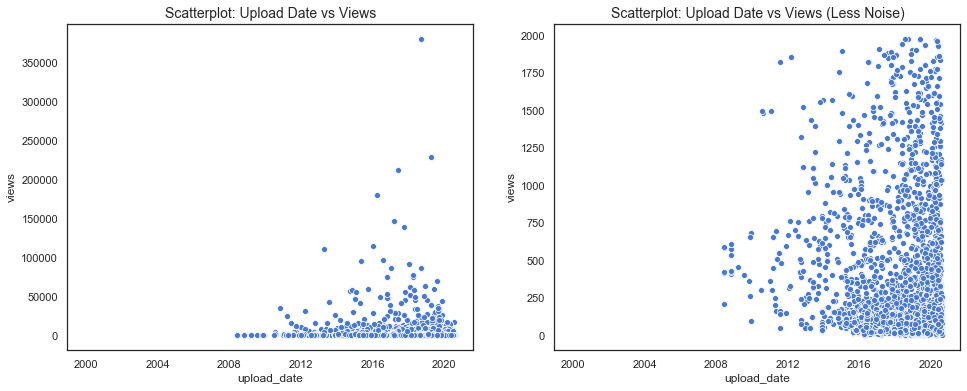

In [48]:
#plotting upload date vs views
fig, (ax1, ax2) = plt.subplots(1,2)

sns.scatterplot(x=data.upload_date, y=data.views, ax=ax1)
ax1.set_title('Scatterplot: Upload Date vs Views', fontsize=14)

#plotting upload date with less noise
sns.scatterplot(x=data.upload_date, y=data.views[data.views<2000], ax=ax2)
ax2.set_title('Scatterplot: Upload Date vs Views (Less Noise)', fontsize=14);

Newer listings appear to garner more views. This may speak to the increase in Etsy users over the years. Additionally, observations with a high number of views are dense in the 2020 region. According to Google Trends, interest in Etsy has almost doubled from December 2019, til present (2020) - this can be viewed in the plot below. This explains the dense region described.

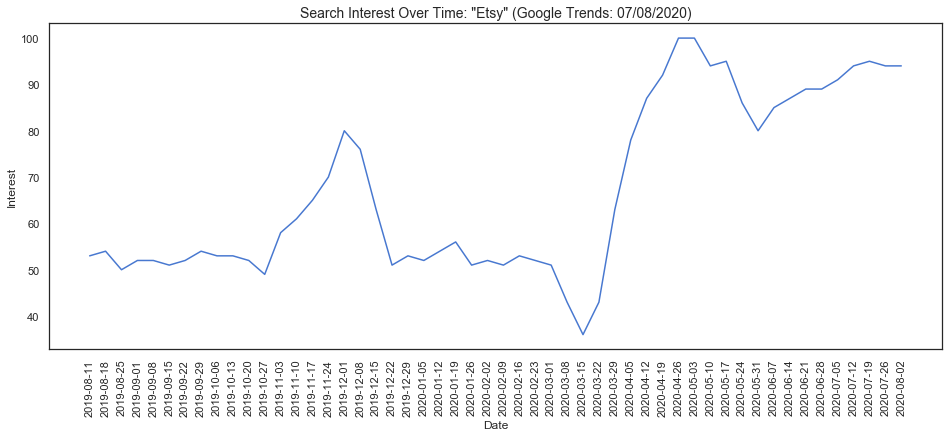

In [51]:
#plotting the Google Trends Etsy graph
gt_df = pd.read_csv('multiTimeline.csv')
gt_df.drop('Week', axis=0, inplace=True)
plt.plot(gt_df.index, gt_df['Category: All categories'].astype(float))
plt.title('Search Interest Over Time: "Etsy" (Google Trends: 07/08/2020)', fontsize=14)
plt.ylabel('Interest')
plt.xlabel('Date')
plt.xticks(rotation=90);

### 6.3 Popular Tags & Titles

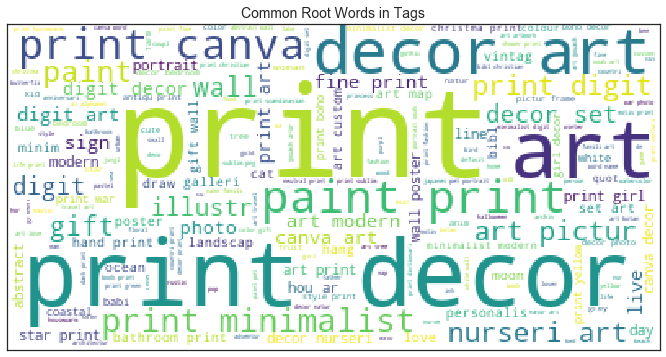

In [52]:
from wordcloud import WordCloud

#plotting popular tags
sentences = data.tags.to_string()
sentences_as_one_string ="".join(sentences)

plt.grid(False)
plt.imshow(WordCloud(background_color='white').generate(sentences_as_one_string))
plt.title('Common Root Words in Tags', fontsize=14)
plt.xticks([])
plt.yticks([]);

([], <a list of 0 Text yticklabel objects>)

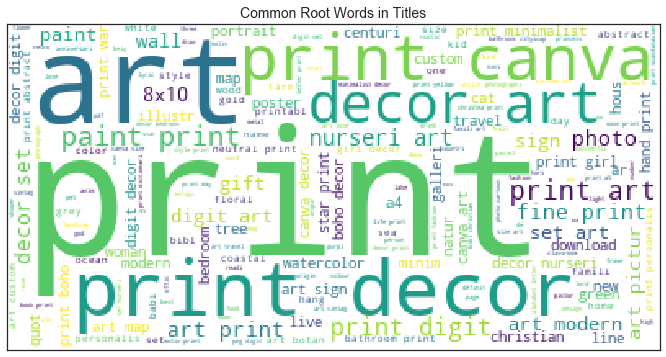

In [53]:
#plotting popular titles
sentences = data.title.to_string()
sentences_as_one_string ="".join(sentences)

plt.grid(False)
plt.imshow(WordCloud(background_color='white').generate(sentences_as_one_string))
plt.title('Common Root Words in Titles', fontsize=14)
plt.xticks([])
plt.yticks([])

Words such as 'print', 'decor', 'poster', and 'art' are commont words found in tags and titles. This is expected, as they describe the category of product being sold, and thus it is highly likely that the seller uses these words in their descriptors.

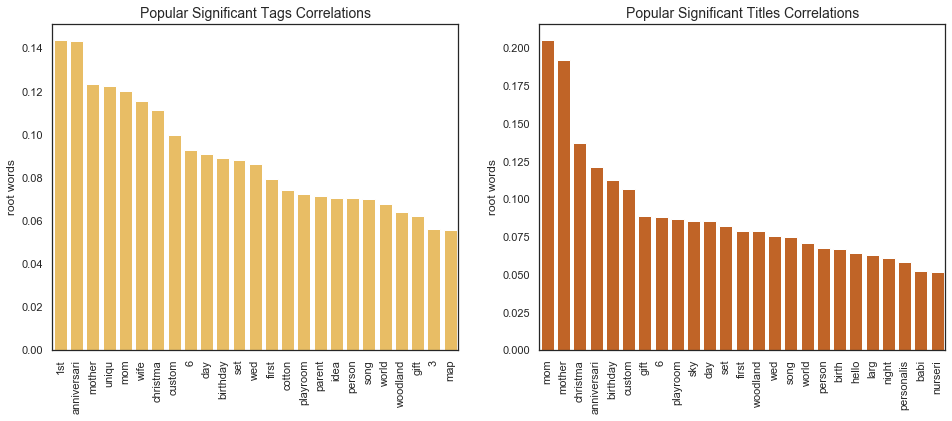

In [54]:
#plotting the correlations for significant tags & titles

#getting significant words
tag_feat = tags_sig.head(25).features.to_list()
tag_correl = tags_sig.head(25).correl.to_list()

title_feat = title_sig.head(25).features.to_list()
title_correl = title_sig.head(25).correl.to_list()

fig, (ax1, ax2) = plt.subplots(1,2)

#plotting tags 
sns.barplot(x=tag_feat, y=tag_correl, color='#fec44f',ax=ax1)
ax1.set_title('Popular Significant Tags Correlations', fontsize=14)
ax1.set_ylabel('correlation')
ax1.set_ylabel('root words')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

#plotting titles 
sns.barplot(x=title_feat, y=title_correl, color='#d95f0e',ax=ax2)
ax2.set_title('Popular Significant Titles Correlations', fontsize=14)
ax2.set_ylabel('correlation')
ax2.set_ylabel('root words')
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

The most correlated words that appear in the tags and titles are displayed above. The word '1st' and 'mom' are the most correlated. That being said, the most correlated words have a correlation of around 0.15 and 0.2 in both the titles and tags respectively. This indicates a weak positive correlation. However, it does give us some insight into what the market's interests are. We can see that products pertaining to moms, or special days such as anniversaries or birthdays are popular. Additionally, products that relate to children appear to be of interest.

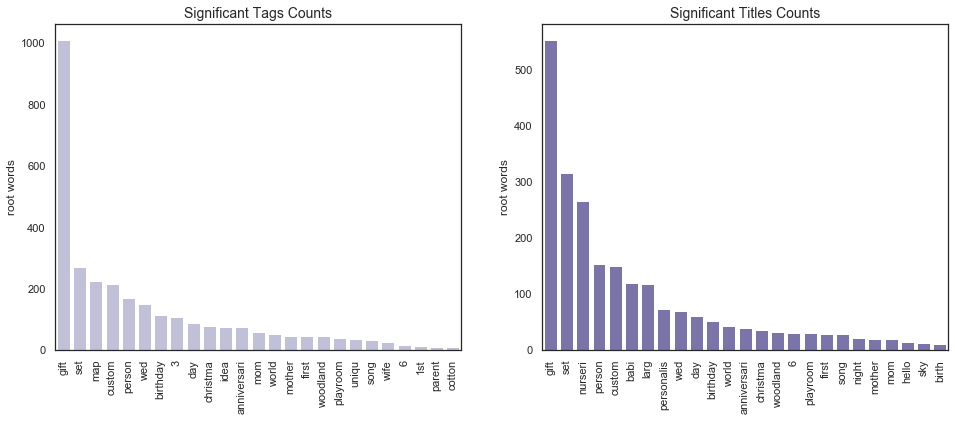

In [56]:
#plotting the count for significant tags & titles

#getting significant words
tag_feat = tags_sig.head(25).sort_values(by='counts', ascending=False).features.to_list()
tag_count = tags_sig.head(25).sort_values(by='counts', ascending=False).counts.to_list()

title_feat = title_sig.head(25).sort_values(by='counts', ascending=False).features.to_list()
title_count = title_sig.head(25).sort_values(by='counts', ascending=False).counts.to_list()

fig, (ax1, ax2) = plt.subplots(1,2)

#plotting tags 
sns.barplot(x=tag_feat, y=tag_count, color='#bcbddc',ax=ax1)
ax1.set_title('Significant Tags Counts', fontsize=14)
ax1.set_ylabel('count')
ax1.set_ylabel('root words')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

#plotting titles 
sns.barplot(x=title_feat, y=title_count, color='#756bb1',ax=ax2)
ax2.set_title('Significant Titles Counts', fontsize=14)
ax2.set_ylabel('count')
ax2.set_ylabel('root words')
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

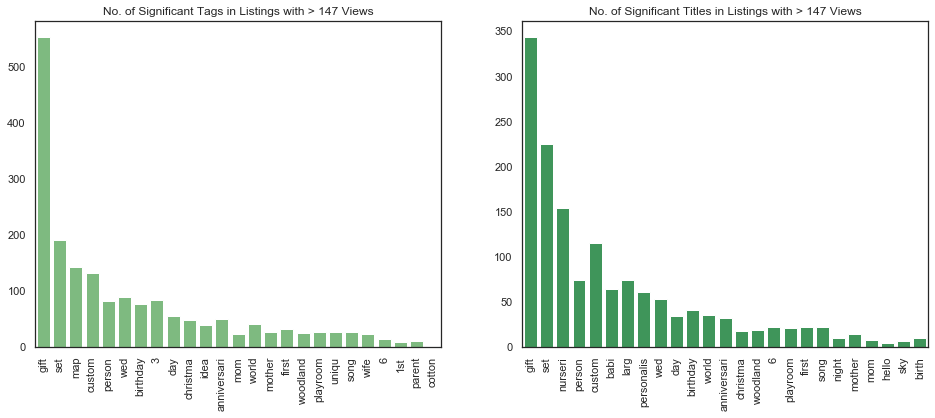

In [57]:
#plotting number of times root words appeared in the upper 25% of most viewed

def y_val_upper(words, tag_or_title):
    y_values = []
    
    for word in words:
        n = 0

        for i in range(len(data)):
            obs = data.loc[i]
            if (word in (obs[tag_or_title])) & (obs.upper_views==1):
                n += 1
        y_values.append(n) 
        
    return y_values

fig, (ax1, ax2) = plt.subplots(1,2)

title_y_values = y_val_upper(title_feat, 'title')
tag_y_values = y_val_upper(tag_feat, 'tags')

sns.barplot(x=tag_feat.sort_values(), y=tag_y_values, ax=ax1, color='#74c476')
ax1.set_title('No. of Significant Tags in Listings with > 147 Views')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

sns.barplot(x=title_feat, y=title_y_values, ax=ax2, color='#31a354')
ax2.set_title('No. of Significant Titles in Listings with > 147 Views')
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

By viewing the number of keywords that appeared in listings with the upper quartile of views, the following was observed:
- Titles and tags that included the word 'gift' had more listings in the views upper quartile

This is an interesting finding as it indicates the interest of our market. Additional unusual words that appear to be correlated and are not common words in titles or tags are: 
- movi (root word for movie)
- birthday
- personalis (root word for personalized)
- custom
- anniversari (root word for anniversary)

The latter three words indicates that consumers enjoy products that are personal and can be gifted.

### 6.3 Benefit of Having 'Print' in the Beginning of the Title
We will investigate whether including the word 'Print' in the first three words of the title has an influence on the number of views.

In [62]:
#I will create a function to generate pie charts for binary features
def binary_pie_chart(feature, df, col1, col2):
    plt.rcParams['axes.titlepad'] = (18)
    plt.rcParams['axes.titlesize'] = (14)
    
    fig = plt.figure(figsize=(18, 9))
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.4)

    size = 0.4
    r = 1.25

    main = plt.subplot(grid[:, 1])
    sub1 = plt.subplot(grid[0, 2:])
    sub2 = plt.subplot(grid[1, 2:])

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.array([col1,col2]))

    val1 = df.total.to_list()
    val2 = df.loc[True].to_list()[1:3]
    val3 = df.loc[False].to_list()[1:3]

    main.pie(val1, radius=r, colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'),labels=[feature + ': False \n' + str(val1[0]), feature + ': True \n' + str(val1[1])], startangle=20, textprops={'fontsize': 12.5})
    main.title.set_text(feature + ' percentage')
    
    sub1.pie(val2, radius=r, colors=cmap(np.array([col2, col2+1])),
           wedgeprops=dict(width=size, edgecolor='w'),labels=['> 147 Views: \n' + str(df.outlier_perc.loc[True]) + '%', ''], textprops={'fontsize': 12.5}, startangle=35)
    sub1.title.set_text(feature + ': True')

    sub2.pie(val3, radius=r, colors=cmap(np.array([col1, col1+1])),
           wedgeprops=dict(width=size, edgecolor='w'),labels=['> 147 Views: \n' + str(df.outlier_perc.loc[False]) + '%', ''], textprops={'fontsize': 12.5}, startangle=35)
    sub2.title.set_text(feature + ': False')

In [63]:
#create function for piechart plotting
def pie_plot_df(feature, df):
    df['total'] = data[feature].value_counts()
    df['outlier'] = data[data.views > 147][feature].value_counts()
    df['less_than'] = df.total - df.outlier
    df['outlier_perc'] = round((df.outlier/df.total)*100,1)
    df.sort_index(inplace=True)
    return df

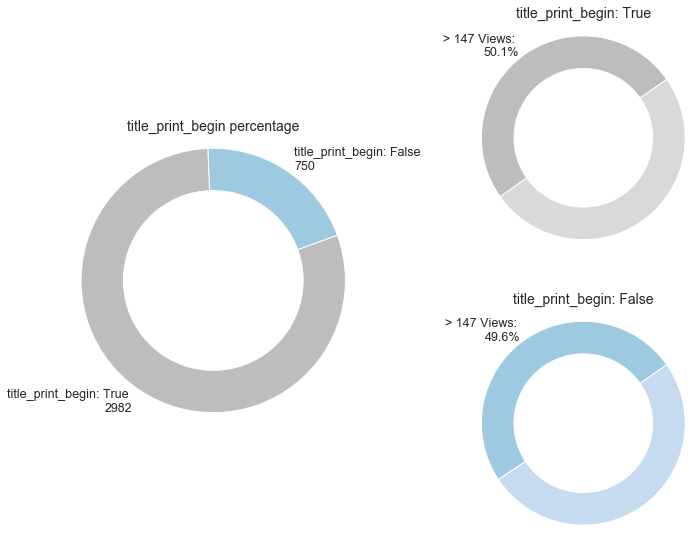

In [64]:
#retrieving values
title_begin_df = pd.DataFrame()
title_begin_df = pie_plot_df('title_print_begin', title_begin_df)

#plotting chart
binary_pie_chart('title_print_begin', title_begin_df, 2, 18)

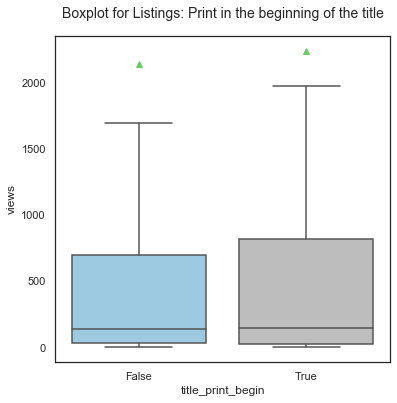

In [65]:
#plotting box plot
plt.figure(figsize=(6,6))
plt.title('Boxplot for Listings: Print in the beginning of the title')
ax = sns.boxplot(y='views', x='title_print_begin', data=data, showmeans=True, showfliers=False)
false_box = ax.artists[0]
false_box.set_facecolor('#9ecae1')
true_box = ax.artists[1]
true_box.set_facecolor('#bdbdbd')

- The majority of listings appear to have the word 'Print' in the first three words of the title. Both categories of listings with and without 'print' in the beginning of the title have around 50% of listings that got more than the median number of views. 
- In terms of the distribution of views for each option, both sets have outliers that distort the mean. The median of views for each set is approximately equal. But the views interquartile range for the listings which meet the condition is greater than the views interquartile range for listings that do not include 'print' in the beginning of the title. This indicates a higher variance, and a greater probability of getting a slightly higher number of views if the word 'print' is not in the beginning of the title.

### 6.4 Listing Price

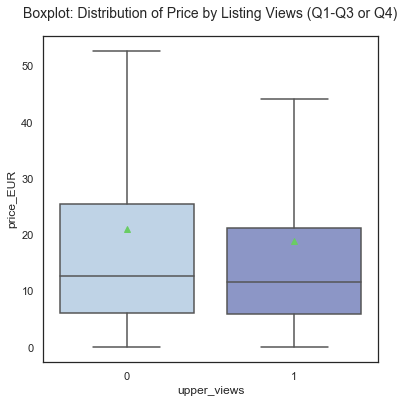

In [66]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(y=data.price_EUR, x=data.upper_views, showfliers=False, showmeans=True)
plt.title('Boxplot: Distribution of Price by Listing Views (Q1-Q3 or Q4)')
false_box = ax.artists[0]
false_box.set_facecolor('#bfd3e6')
true_box = ax.artists[1]
true_box.set_facecolor('#8c96c6')

- The price mean and median for listings that garnered more views than 50% of the listings is almost equivalent to the that of the lower 50% of listings.
- The interquartile range for the bottom 50% appears greater with a greater tail. This indicates that buyers are less likely to look at exceptionally expensive items (around the 40 EUR mark).

### 6.5 Is Listing Digital
Digital listings refer to digital download prints. Buyers purchase the product on Etsy, and are then able to electronically download the product. There is no physical object transfer involved.

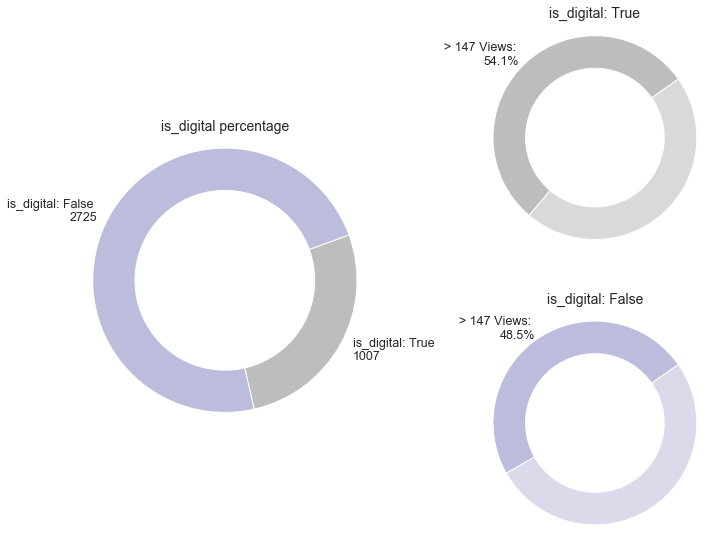

In [67]:
#retrieving values
digi_df = pd.DataFrame()
digi_df = pie_plot_df('is_digital', digi_df)

#plotting chart
binary_pie_chart('is_digital', digi_df, 14, 18)

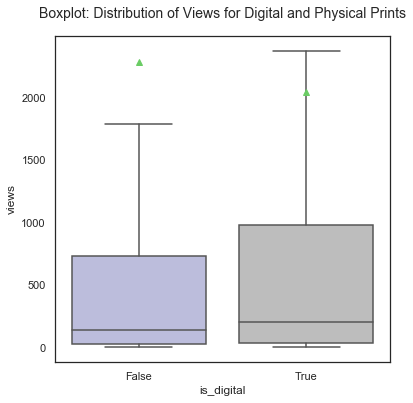

In [68]:
#plotting box plot for is_digital distribution
plt.figure(figsize=(6,6))
ax = sns.boxplot(y=data.views, x=data.is_digital, showfliers=False, showmeans=True)
plt.title('Boxplot: Distribution of Views for Digital and Physical Prints')
false_box = ax.artists[0]
false_box.set_facecolor('#bcbddc')
true_box = ax.artists[1]
true_box.set_facecolor('#bdbdbd')

- The majority of listings are not digital, and are instead physical prints
- However, 54.1% of digital listings featured in the upper 50%. This is slightly greater than 48.5% of non-digital listings that featured in the views upper quartile.
- The median views for digital listings is slightly higher than that of the non-digital listings. Additionally the views upper quartile is greater than physical listings, indicating greater spread, and slightly higher probabilities of achieving a slightly higher number of views in comparison.

### 6.6 Is Featured
A featured listing is a listing that a seller selects to be featured at the top of their Etsy store's homepage. Since these listings are the first products to be displayed on ones store, the number views may be greater for these listings.

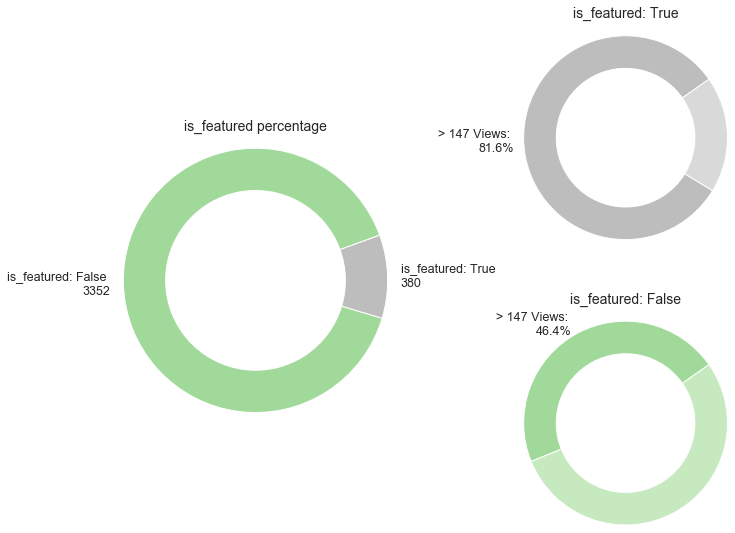

In [69]:
#retrieving values
feat_df = pd.DataFrame()
feat_df = pie_plot_df('is_featured', feat_df)

#plotting chart
binary_pie_chart('is_featured', feat_df, 10, 18)

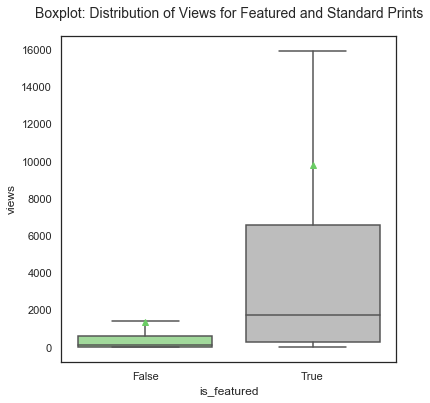

In [70]:
#plotting box plot for is_featured distribution
plt.figure(figsize=(6,6))
ax = sns.boxplot(y=data.views, x=data.is_featured, showfliers=False, showmeans=True)
plt.title('Boxplot: Distribution of Views for Featured and Standard Prints')
false_box = ax.artists[0]
false_box.set_facecolor('#a1d99b')
true_box = ax.artists[1]
true_box.set_facecolor('#bdbdbd')

- A minority of listings are featured. This is expected as Sellers are only allowed to select 4 featured listings to be displayed on the seller's shop homepage at any given time.
- 82.6% of featured listing had views that exceed the median number of views.
- From the boxplot, it is evident that there is a greater probability for featured listings to achieve a higher number of views in comparison to standard listings.

### 6.7 Has Variations
Variations refer to whether that specific listing is available in different variations, for example in size, dimensions, or colors. We will explore whether variations has influence on the number of views.

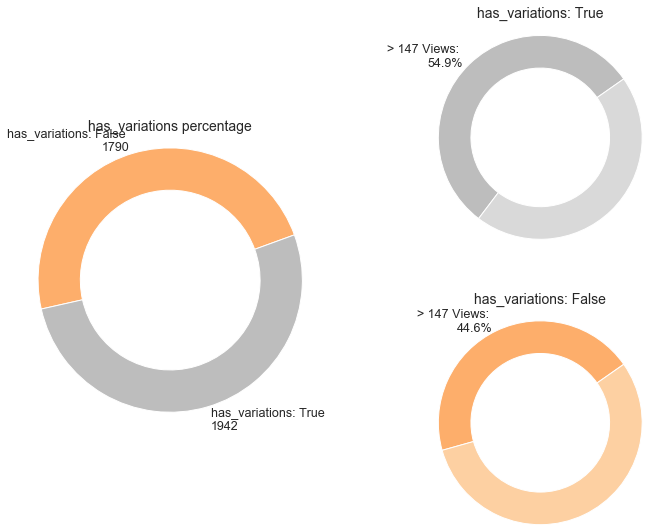

In [71]:
#retrieving values
variation_df = pd.DataFrame()
variation_df = pie_plot_df('has_variations', variation_df)

#plotting chart
binary_pie_chart('has_variations', variation_df, 6, 18)

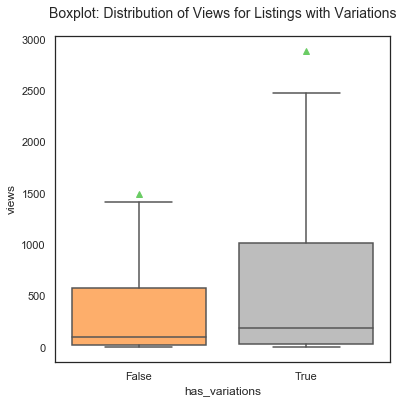

In [72]:
#plotting box plot for is_featured distribution
plt.figure(figsize=(6,6))
ax = sns.boxplot(y=data.views, x=data.has_variations, showfliers=False, showmeans=True)
plt.title('Boxplot: Distribution of Views for Listings with Variations')
false_box = ax.artists[0]
false_box.set_facecolor('#fdae6b')
true_box = ax.artists[1]
true_box.set_facecolor('#bdbdbd')

- There is an approximately equal split between listings with variations and listings without
- Listing with variations have a higher percentage of listings with views greater than the median (54.9%) than listings without variations available (44.6%). This may indicate a preference for listings that are available in different sizes and speaks a degree of customization.

### 6.8 Is Customizable
Customizable refers to listings that can be personalized. For example, a pet self-portrait. These items are generally made to order. We will explore the impact that customization has on views.

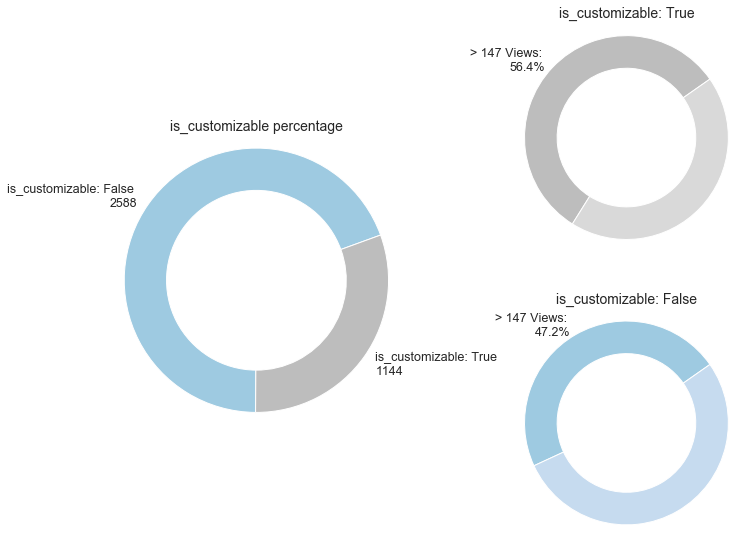

In [73]:
#retrieving values
custom_df = pd.DataFrame()
custom_df = pie_plot_df('is_customizable', custom_df)

#plotting chart
binary_pie_chart('is_customizable', custom_df, 2, 18)

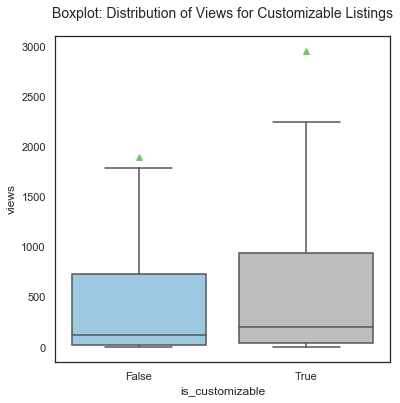

In [74]:
#plotting box plot
plt.figure(figsize=(6,6))
plt.title('Boxplot: Distribution of Views for Customizable Listings')
ax = sns.boxplot(y='views', x='is_customizable', data=data, showmeans=True, showfliers=False)
false_box = ax.artists[0]
false_box.set_facecolor('#9ecae1')
true_box = ax.artists[1]
true_box.set_facecolor('#bdbdbd')

- Around 1/3 of listings are customizable.
- 56.4% of listings that can be customized fall into the views upper 50%, this is greater than listings that aren't customizable where only 47.2% of listings fall into the upper 50%. 

### 6.9 Number of Favorers

#### 6.9.1 Number of Listing Favorers
The number of favorers refers to the number of buyers that have 'starred' the listings as a favorite. This is similar to the concept of a 'wishlist'.

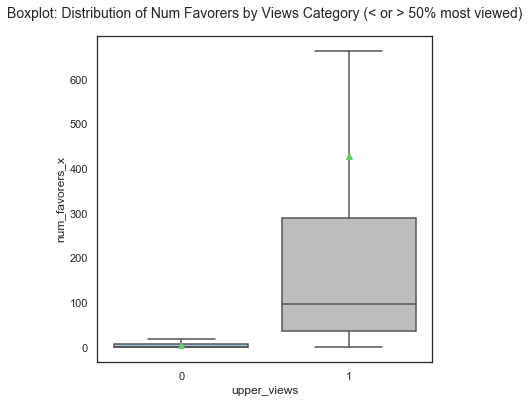

In [75]:
#plotting box plot for number of favorers by views category
plt.figure(figsize=(6,6))
plt.title('Boxplot: Distribution of Num Favorers by Views Category (< or > 50% most viewed)')
ax = sns.boxplot(y='num_favorers_x', x='upper_views', data=data, showmeans=True, showfliers=False)
false_box = ax.artists[0]
false_box.set_facecolor('#9ecae1')
true_box = ax.artists[1]
true_box.set_facecolor('#bdbdbd')

Listings with more than 147 views have a substantial higher number of favorers in comparison to listing that achieved less than 147 views. That being said, it is difficult to determine which is the indepent variable in this comparison. This is expected as more views result in a higher probability of more buyers selecting the listing as a favorite, as more buyers are being exposed to the listing. This feature would incur a lot of data leakage in a classification model, mainly because you cannot predict the views of listing with information that you do not have - such as, the number of favorers. This is a feature that accumulates after the listing has been posted.

#### 6.9.2 Number of Shop Favorers
The number of shop favorers refers to the number of buyers that have 'starred' the specific Etsy store as a favorite. 

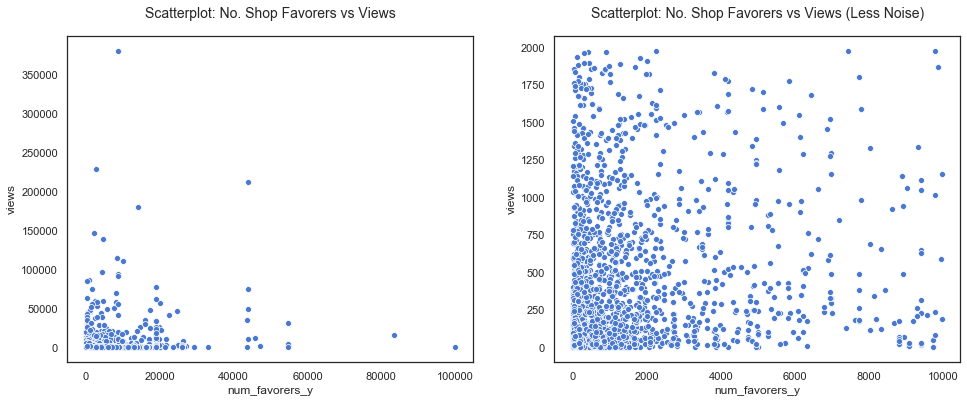

In [76]:
#plotting number of shop favorers a listing has vs views
fig, (ax1, ax2) = plt.subplots(1,2)

sns.scatterplot(x=data.num_favorers_y, y=data.views, ax=ax1)
ax1.set_title('Scatterplot: No. Shop Favorers vs Views', fontsize=14)

#plotting updated number of shop favorers a listing has vs views
sns.scatterplot(x=data.num_favorers_y[data.num_favorers_y < 10000], y=data.views[data.views<2000], ax=ax2)
ax2.set_title('Scatterplot: No. Shop Favorers vs Views (Less Noise)', fontsize=14);

- There appears to be a concentration of stores with less than 2000 favorers
- There doesn't appear to be a strong positive correlation between the number of shop favorers and the number of listing views. This is interesting, as we would expect shops with more followers to have their listings viewed more often.

### 6.10 Listings Active Count
This feature refers to the number of listings a seller has in their Etsy store. We will investigate the relationship between store size and the number of views a listing gets.

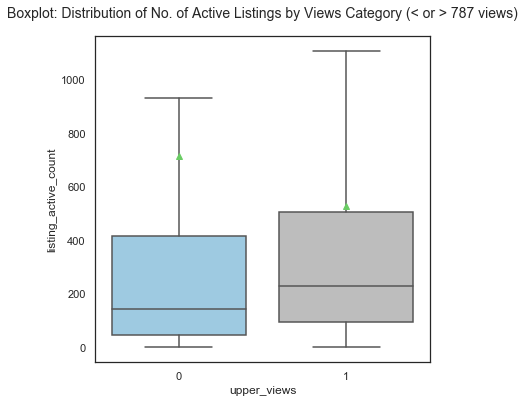

In [77]:
#plotting box plot for listings active count by views category
plt.figure(figsize=(6,6))
plt.title('Boxplot: Distribution of No. of Active Listings by Views Category (< or > 787 views)')
ax = sns.boxplot(y='listing_active_count', x='upper_views', data=data, showmeans=True, showfliers=False)
false_box = ax.artists[0]
false_box.set_facecolor('#9ecae1')
true_box = ax.artists[1]
true_box.set_facecolor('#bdbdbd')

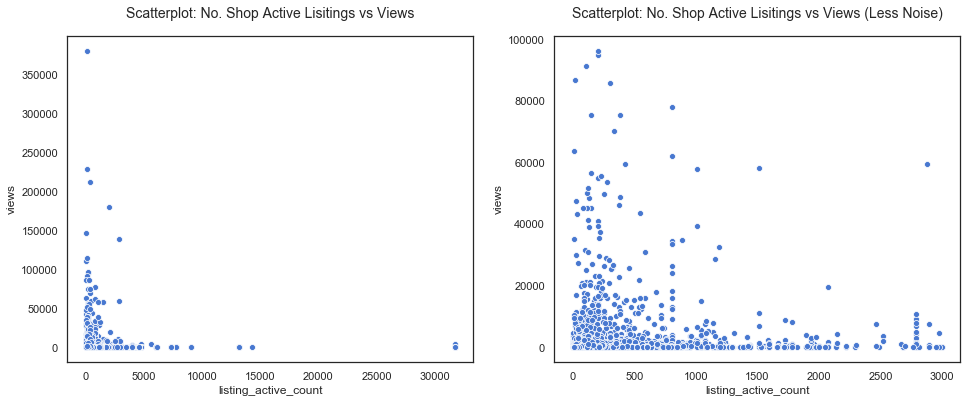

In [78]:
#plotting number of active listings a store has vs views
fig, (ax1, ax2) = plt.subplots(1,2)

sns.scatterplot(x=data.listing_active_count, y=data.views, ax=ax1)
ax1.set_title('Scatterplot: No. Shop Active Lisitings vs Views', fontsize=14)

#plotting updated number of active listings a store has vs views
sns.scatterplot(x=data.listing_active_count[data.listing_active_count < 3000], y=data.views[data.views<100000], ax=ax2)
ax2.set_title('Scatterplot: No. Shop Active Lisitings vs Views (Less Noise)', fontsize=14);

- Listings that garnered more than the median number of views appear to have a higher number of listings in that respective's seller shop.
- From the scatter plot, stores with less than 500 listings appear to have listings with more views
- Stores with a high number of listing counts (>1000) did particularly badly in terms of the number of views their listings garnered. This may be due to too much variety in their store which may be potentially overwhelming for customers.
- Additionally, stores with a high number of listings are more likely to have manufactured or products that are not unique, which do not interest the Etsy's craft-interested customer base.

### 6.11 Correlations
To consolidate our findings, we will plot a correlation matrix to conclude which features should be selected for our model.

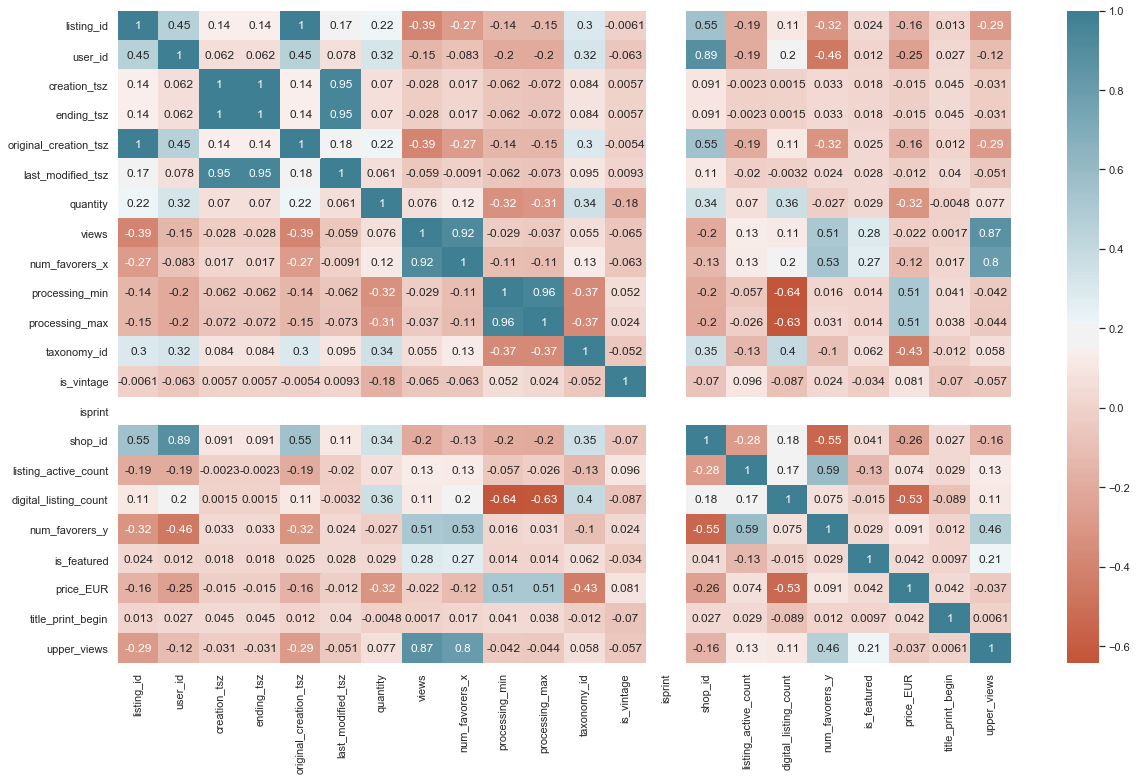

In [79]:
#calculating and plotting correlations
corr = data.corr(method='spearman')
plt.figure(figsize=(20,12))
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200), annot=True)

From the correlation matrix we will select the most favorable features. That being said 'views' and 'num_favorers_x' will not be included into our model as these features incur data leakage. When uploading a listing, this information is not available about that specific listing at that moment in time. Thus predictions cannot be made with data that is not yet available.

In [183]:
#selecting significant features:
cols_keep = ['quantity', 'num_favorers_y','is_featured','digital_listing_count','listing_active_count','upper_views','original_creation_tsz','is_supply','is_customizable','is_digital','has_variations']

## 7. Modelling
We will now model our data. We will use the following algorithms to train our model, and select the model with the best results:
- Logistic Regression
- Naive Bayes Classifier
- Random Forest Trees Classifier

Considering our dataset is small, we will use cross validation to score our models, instead of splitting our data into a train and test set.

First we will combine the data dataframe with our selected features with the top 30 most correlated title and tag words.

In [184]:
#select the 30 most significant feature words 
tag_words = tags_sig.head(30).features.to_list()
title_words = title_sig.head(30).features.to_list()

In [185]:
#create dataframe for modelling by combining the vectorized words and data df
model_df = pd.concat([data[cols_keep],tags_mlb[tag_words],title_mlb[title_words]], axis=1)

In [186]:
#import ordinal encoder to encode the boolean features 
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

boolean_cols = ['is_supply','is_customizable','is_digital','is_featured','has_variations']

#encoding boolean feature boolean features
# model_df.is_featured = encoder.fit_transform(model_df.is_featured)
boolean_df = pd.DataFrame(encoder.fit_transform(model_df[boolean_cols]), columns=boolean_cols)

#concatenating to model_df
model_df.drop(boolean_cols, 1, inplace=True)
model_df = pd.concat([model_df, boolean_df], 1)

In [187]:
#import scoring metric
from sklearn.model_selection import cross_val_score

#writing a function to evaluate our models
def score(model, X, y, folds):
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
    precision = cross_val_score(model, X, y, cv=5, scoring='precision_weighted')
    recall = cross_val_score(model, X, y, cv=5, scoring='recall_weighted')
    print('f1-score: ', str(f1.mean()))
    print('precision: ', str(precision.mean()))
    print('recall: ', str(recall.mean()))

### 7.1 Logistic Regression

In [188]:
#import Logistic Regression algorithm and create an instance of the object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [189]:
#define target and features as X and y
y = model_df.upper_views
X = model_df.drop('upper_views', 1)

In [190]:
#scoring the logistic regression model
score(lr,X,y,5)

f1-score:  0.33392902351629916
precision:  0.25053637271916573
recall:  0.5005358341318805


### 7.2 Naive Bayes Classifier
Our target variable is binary, as such we will use the Bernoulli Naive Bayes algorithm to model our data.

In [191]:
#import Naive Bayes Classifier algorithm and create an instance of the object
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()

In [192]:
#score model
score(NB,X,y,5)

f1-score:  0.60775397301846
precision:  0.6259745302588349
recall:  0.6152237188252564


### 7.3 Random Forest Classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [194]:
#score model
score(RFC, X, y, 5)

f1-score:  0.7858919547585558
precision:  0.7961355719707255
recall:  0.7867121748836274


##### Model Evaluation:
 
- The Logistic Regression model performed the worst, and has a particularly low precision score. This indicates that the model is highly inclined to predict False Positives. 
- The Naive Bayes Classifier model performed better than the Logistic Regression model. Additionally, our precision and recall scores were almost equivalent. However an F1, precision, and recall score of approximately 0.6 is poor and unsuitable for making reliable predicitions.
- The Random Forest Classifier model provides the best results from the three different models. The precision and recall score were approximately equivalent, with a score of 0.79. This indicates that the Random Forest Classifer model is more reliable than our Naive Bayes Classifier model.
- That being said, an F1 score of 0.8 is not highly reliable. This is expected, as there are definitely improvements that can be made to the model by exploring the market's interest. For example, we could explore the print type - for example, is it an illustration, quote, photograph etc. These market interests would have an influence on the number of views, which could be beneficial to this model. 

### 7.4 Model Selection & Feature Importance
Now that we have evaluated and selected the best model, we will fit our RandomForestClassifier model, and view what the important features are.

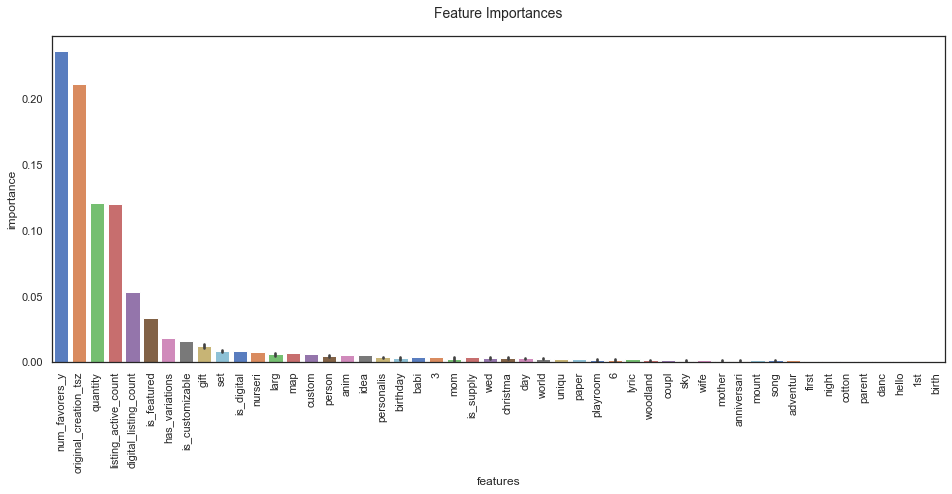

In [196]:
#fitting selected model
RFC.fit(X,y)

feat_importance = pd.DataFrame()
feat_importance['importance'] = RFC.feature_importances_
feat_importance['features'] = X.columns
feat_importance.sort_values('importance', inplace=True, ascending=False)
sns.barplot(x=feat_importance.features, y=feat_importance.importance, palette='muted')
plt.title('Feature Importances')
plt.xticks(rotation=90);

From the random forest classifier model of our data, we can see that the following aspects have a high influence on whether a listing will garner more views than the median:
- Number of Shop Favorers - Sellers who have more followers appear to have a higher chance of get a high number of views on their listings. This was not an observation that we picked up during our explanatory data analysis, which may have been a result of too much noise to visualize the correct relationship.
- The original upload date plays a big part, newer listings will garner more views than older listings
- The size of the store additionally plays a role in the number of views a listing will get
- Whether the feature is set as a highlight on the sellers page also has an influence, as we saw in the explanatory data analysis.
- Listings with 'poster', 'gift', 'print', 'set', and 'nursery' in their tags and titles also appear to have an influence on views.

## 8. Conclusion & Recommendations

### 8.1 The Model
The selected model for this problem statement was the Random Forest Classifier. This model outperformed the Logistic Regression and Naive Bayes models, and scored a weighted F-1 Score of 0.78. That being said, there is definite room for improvement. With an F-1 Score of 0.78, there is still a leftover 28% of features that explain variation in our target. As discussed, the next step to improve this model would be to include detailed data about the listings that will talk to market preferences, which could potentially have a high influence on the popularity of a listing in terms of views. 

##### Examples of listings details could be:
- Colour
- Type of listing: is it an illustration, quote, or photograph
- Theme, for example: animals, sunsets, home-quotes
- Paper type for physical listings

### 8.2 Additional Inferences for Our Client:
From this project, the following inferences can be made which can be used to advise our client:
1. Make use of the 'Featured' option on your store for prints that have the potential to be popular.
2. Market your store to get more store followers.
3. Constantly update your listings, old listings don't necessarily do well in the long run. Additionally new listings will benefit old listings as customers click on your store to view similar products.
4. Try and have a good number of listings on your store - but not too much to make it overwhelming. Your total listing count should be less than 200.
5. Ensure quantites of your product are available.
6. Use the customizable feature if your product can be customized - don't only list that options are available in the description. 
7. The same applies for the 'has_variation' feature. If your listing comes in different sizes, ensure that you use this feature as opposed to only listing the sizes in the description.
8. Gifts, children, and personal related items appear to garner more views, and could result in more sales.

In [141]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")